In [1]:
import pandas as pd

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [2]:
#Loading Amazon UK product dataset
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
#1.1 Create a crosstab between the product category and the isBestSeller status. 
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
#1.2  Are there categories where being a best-seller is more prevalent?
crosstab['isBestSeller'] = crosstab[True] / (crosstab[True] + crosstab[False])
crosstab


isBestSeller,False,True,isBestSeller
category,,,
3D Printers,247,1,0.004032
3D Printing & Scanning,4065,2,0.000492
Abrasive & Finishing Products,245,5,0.020000
Action Cameras,1696,1,0.000589
Adapters,251,3,0.011811
...,...,...,...
Wind Instruments,243,7,0.028000
Window Treatments,234,5,0.020921
Women,17559,213,0.011985


In [5]:
#Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

sorted_crosstab = crosstab.sort_values(by='isBestSeller', ascending=False)
sorted_crosstab

isBestSeller,False,True,isBestSeller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [6]:
from scipy.stats import chi2_contingency

In [7]:

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [8]:
# Since the Cramer V can only be applied to the numerical we have to drop dtype: object
crosstab_cramer = crosstab.drop( columns='isBestSeller')

In [9]:
from scipy.stats.contingency import association

In [10]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.
association(crosstab_cramer , method="cramer")

0.1222829439760564

<Axes: xlabel='category'>

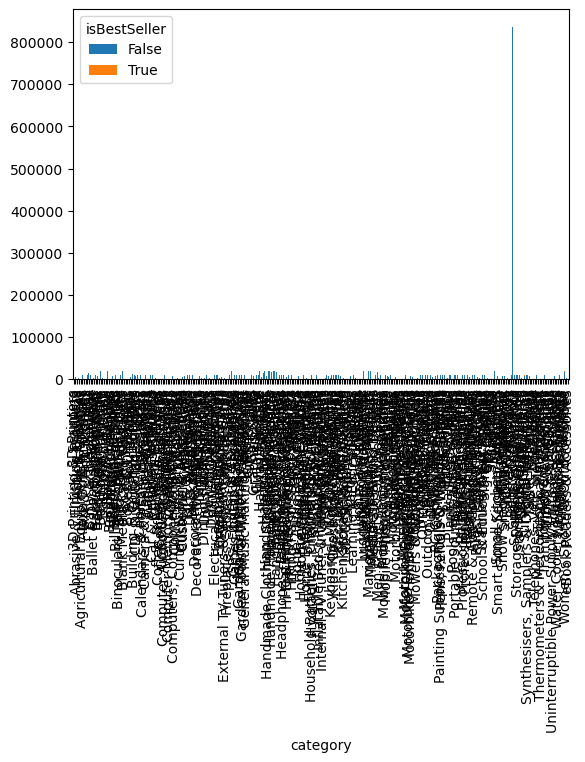

In [11]:
#3 Visualizations:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

crosstab_cramer.plot(kind="bar", stacked=True)

<Axes: xlabel='category'>

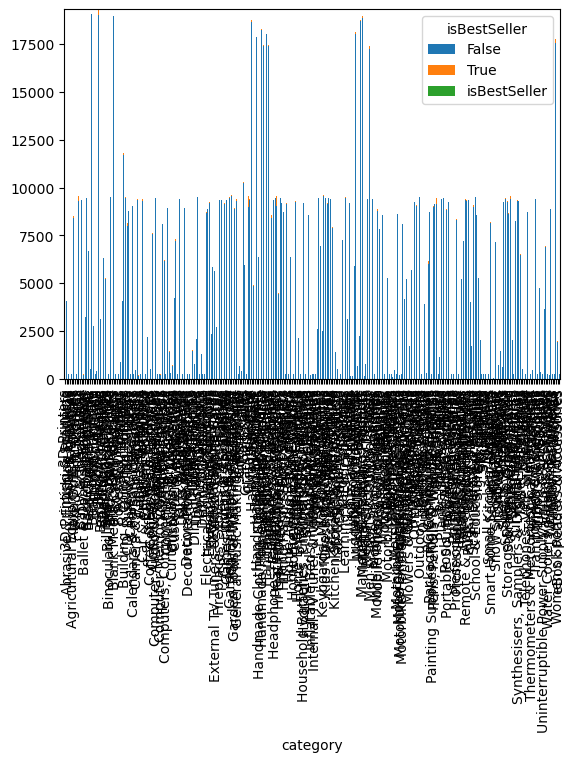

In [12]:
crosstab[crosstab.index != "Sports & Outdoors"].plot(kind="bar", stacked=True)

In [13]:
#Part 2
#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times 
# #the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1
IQR

36.0

In [14]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_filtered

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [15]:
import seaborn as sns


In [16]:
top_20 = df_filtered['category'].value_counts().index[:20]
top_20

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [17]:
df_top_20 = df_filtered[outliers['category'].isin(top_20)]
df_top_20

NameError: name 'outliers' is not defined

C:\Users\marce\AppData\Local\Temp\ipykernel_29404\3188444466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=df_top_20, palette="coolwarm")


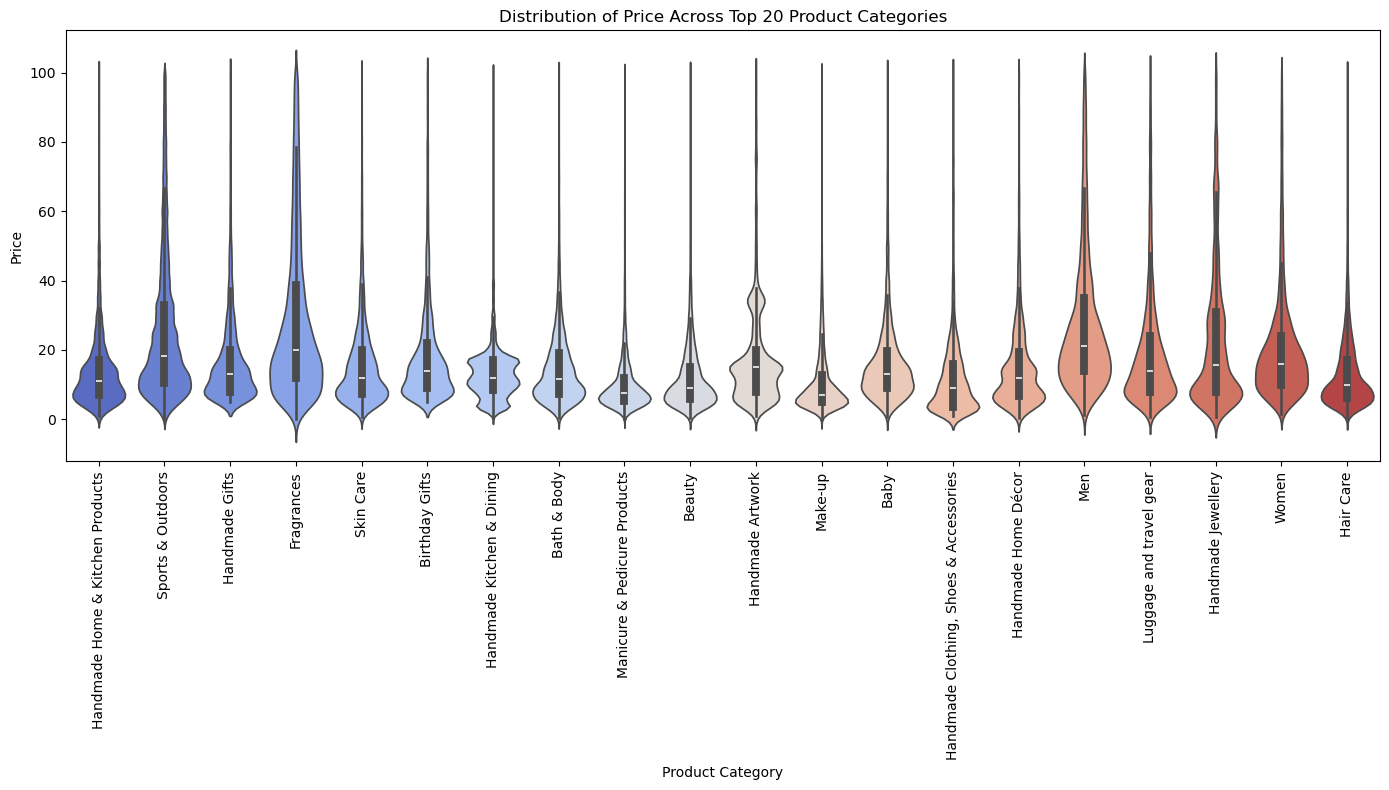

In [ ]:
#1 create the violin plot

plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=df_top_20, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.tight_layout()
plt.show()

In [ ]:
#2
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

median_price_caterogy = df_filtered.groupby('category')['price'].median()
median_price_caterogy.sort_values(ascending=False).idxmax()
top_product_category = median_price_caterogy.sort_values(ascending=False).idxmax()
top_product_category


'Desktop PCs'

In [ ]:
top_10_category = median_price_caterogy.sort_values(ascending=False).head(10)
top_10_category

category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64

In [ ]:
highest_median_price_category = median_price_caterogy.max()
highest_median_price_category
print(f'The top product category is {top_product_category} and price is {highest_median_price_category}')

The top product category is Desktop PCs and price is 74.0


<Axes: title={'center': 'Average Price of Products Across Top 10 Product Categories'}, xlabel='category'>

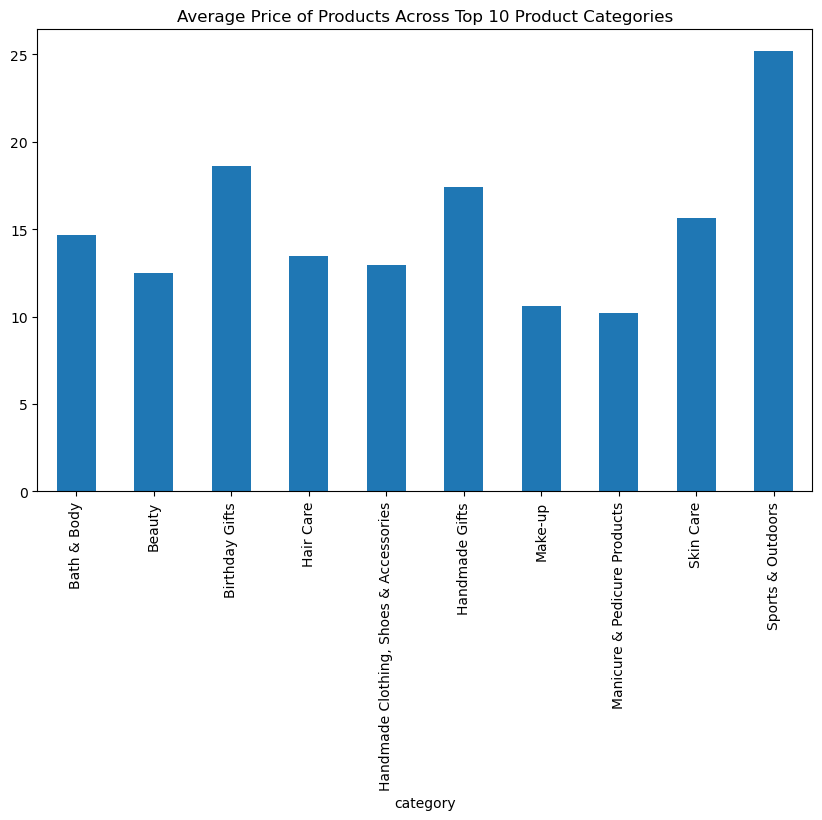

In [ ]:
# Part 2.2 - Create a bar chart comparing the average price of products for the top 10 product categories (based on count)
plt.figure(figsize=(10, 6))
top_10 = df_filtered["category"].value_counts().nlargest(10).index
filtered_top10 = df_filtered[df_filtered["category"].isin(top_10)]
plt.title('Average Price of Products Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.xticks(rotation=45)



top_10_cat_avg_prices = filtered_top10.groupby("category")["price"].mean()

top_10_cat_avg_prices.plot(kind='bar')

In [18]:
# Calculate the correlation coefficient between price and stars
average_prices_by_category = df_filtered.groupby('category')['price'].mean()

In [19]:
highest_average_price_category = average_prices_by_category.idxmax()
highest_average_price = average_prices_by_category.max()

In [20]:
print(f"The category with the highest average price is '{highest_average_price_category}' with an average price of {highest_average_price:.2f}")

The category with the highest average price is 'Motherboards' with an average price of 68.77


In [21]:
#Part 3

top_categories_10 = df_filtered['category'].value_counts().nlargest(10).index
df_filtered_top10 = df_filtered[df_filtered['category'].isin(top_categories_10)]


In [23]:
import matplotlib.pyplot as plt


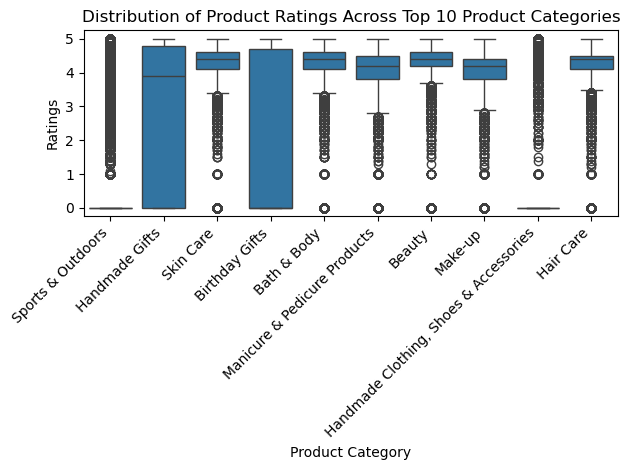

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [25]:
sns.boxplot(x='category', y='stars', data=df_filtered_top10)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Ratings')
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))

In [26]:
#1 
median_ratings_by_category = df_filtered.groupby('category')['stars'].median()

In [27]:
highest_median_rating_category = median_ratings_by_category.idxmax()
highest_median_rating = median_ratings_by_category.max()

In [28]:
print(f"The category with the highest median rating is '{highest_median_rating_category}' with a median rating of {highest_median_rating:.2f}")

The category with the highest median rating is 'Computer Memory' with a median rating of 4.70


In [29]:
correlation_coefficient = df_filtered['price'].corr(df_filtered['stars'])

In [30]:
print(f"The correlation coefficient between price and stars is: {correlation_coefficient:.2f}")

The correlation coefficient between price and stars is: -0.08


In [31]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_filtered['price'], df_filtered['stars'])

print(f"Correlation coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.5f}")

Correlation coefficient: -0.08
P-value: 0.00000


In [32]:
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between product price and its rating.")
else:
    print("There is no significant correlation between product price and its rating.")

There is a significant correlation between product price and its rating.


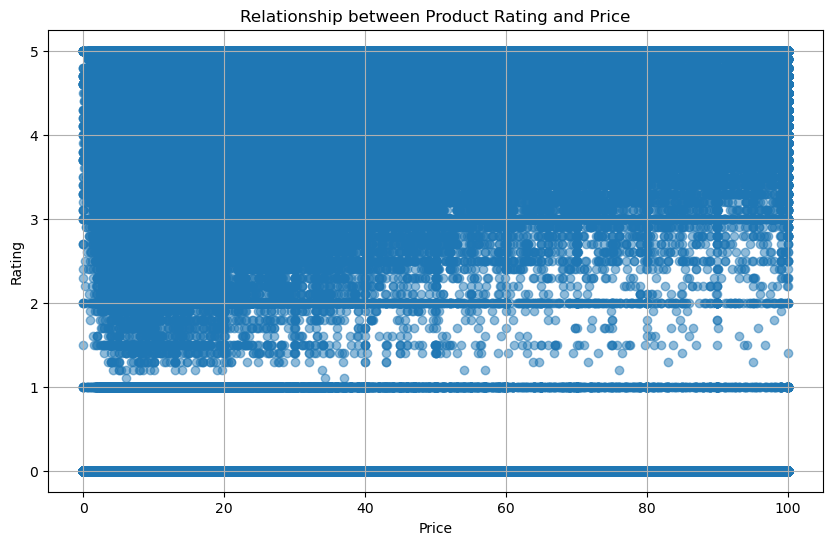

In [33]:
#2

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['price'], df_filtered['stars'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Relationship between Product Rating and Price')
plt.grid(True)
plt.show()


In [34]:
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_columns = ['price', 'stars', 'reviews']

In [35]:

correlation_matrix = df_filtered[numerical_columns].corr()

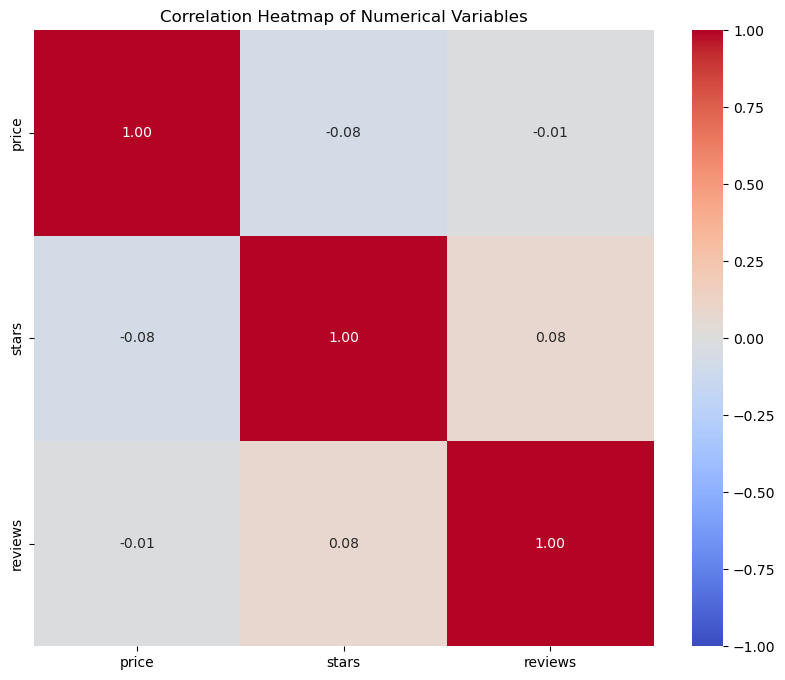

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()